In [1]:
import tensorflow as tf
from keras import models, layers, optimizers, losses
import numpy as np

inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
actual_output = np.array([[0],[1],[1],[0]])

model = models.Sequential([
    layers.Flatten(input_shape=(2,)),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=0.01),
    loss=losses.BinaryCrossentropy(),
    metrics=['accuracy']
)

model.fit(inputs, actual_output, epochs=50, verbose=1)
model.evaluate(inputs, actual_output)

print(np.round(model.predict(np.array([[0,0]]))))
print(model.summary())

c:\Users\prita\OneDrive\Documents\Sem3_codes\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.8244
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.2500 - loss: 0.8138
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.5000 - loss: 0.8037
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5000 - loss: 0.7942
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 0.7852
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5000 - loss: 0.7768
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5000 - loss: 0.7688
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5000 - loss: 0.7614
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5000 - loss: 0.7545
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.5000 - loss: 0.7481
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5000 - loss: 0.7420
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5000 - loss: 0.7364
Epo

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │            12 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53 (216.00 B)

 Trainable params: 17 (68.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 36 (148.00 B)

None


In [2]:
import tensorflow as tf
from keras import layers, models, datasets
import numpy as np

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

x_train = x_train.reshape(-1,28,28,1).astype('float32')/255.0
x_test = x_test.reshape(-1,28,28,1).astype('float32')/255.0

model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Conv2D(64, activation='relu', kernel_size=(3,3)),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)

loss, acc = model.evaluate(x_test, y_test)

print(acc)

c:\Users\prita\OneDrive\Documents\Sem3_codes\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 13ms/step - accuracy: 0.9592 - loss: 0.1325
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - accuracy: 0.9860 - loss: 0.0449
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9907 - loss: 0.0298
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9932 - loss: 0.0217
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9945 - loss: 0.0165
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9889 - loss: 0.0356
0.9889000058174133


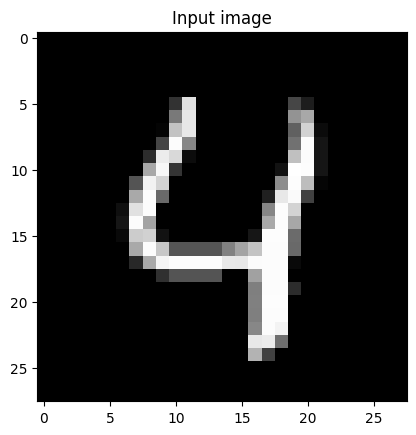

Predicted image is 4


In [6]:
img = x_test[4]
import matplotlib.pyplot as plt
plt.imshow(img.squeeze(), cmap='grey')
plt.title('Input image')
plt.show()

pred = model.predict(np.expand_dims(img, axis=0), verbose=0)
print(f'Predicted image is {pred.argmax()}')

In [10]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

iris = load_iris()
X,y=iris.data, iris.target

scaler = StandardScaler()
X = scaler.fit_transform(X)
encoder = LabelEncoder()
y = encoder.fit_transform(y)

x_train, x_test, y_train, y_test = train_test_split(X,y,random_state=42, test_size=0.2)

model = models.Sequential([
    layers.Dense(10, activation='relu', input_shape=(4,)),
    layers.Dense(3, activation='softmax')
])

model.compile(
    metrics=['accuracy'],
    loss='sparse_categorical_crossentropy',
    optimizer='adam'
)

model.fit(x_train, y_train, epochs=100, batch_size=16, verbose=1)
loss, acc = model.evaluate(x_test, y_test)

print(acc)

Epoch 1/100


c:\Users\prita\OneDrive\Documents\Sem3_codes\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.1833 - loss: 1.7518 
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1917 - loss: 1.6679 
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.2000 - loss: 1.5885
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2250 - loss: 1.5162
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2500 - loss: 1.4462
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.2500 - loss: 1.3789
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.2583 - loss: 1.3200
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3000 - loss: 1.2637
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3167 - loss: 1.2110 
Epoch 10/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3667 - loss: 1.1582 
Epoch 11/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4000 - loss: 1.1095 
Epoch 12/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4333 - loss: 1.0681 

In [ ]:
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.reshape((x_train.shape[0],-1))/255.0
x_test = x_test.reshape((x_test.shape[0],-1))/255.0

model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(3072,)),
    layers.Dense(256, activation='relu'),
    layers.Dense(10)
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=10, batch_size=32, verbose=1)

loss, acc = model.evaluate(x_test, y_test)

print(acc)

c:\Users\prita\OneDrive\Documents\Sem3_codes\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.1000 - loss: 13.5741
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 69s 44ms/step - accuracy: 0.1000 - loss: 13.5876
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 24ms/step - accuracy: 0.1000 - loss: 13.5876
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.1000 - loss: 13.5876
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.1000 - loss: 13.5876
Epoch 6/10


c:\Users\prita\OneDrive\Documents\Sem3_codes\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 - 23s - 30ms/step - accuracy: 0.3327 - loss: 1.8596 - val_accuracy: 0.3887 - val_loss: 1.7031
Epoch 2/10
782/782 - 19s - 25ms/step - accuracy: 0.4059 - loss: 1.6649 - val_accuracy: 0.4004 - val_loss: 1.6636
Epoch 3/10
782/782 - 19s - 25ms/step - accuracy: 0.4356 - loss: 1.5813 - val_accuracy: 0.4421 - val_loss: 1.5597
Epoch 4/10
782/782 - 21s - 26ms/step - accuracy: 0.4528 - loss: 1.5254 - val_accuracy: 0.4573 - val_loss: 1.5362
Epoch 5/10
782/782 - 21s - 27ms/step - accuracy: 0.4710 - loss: 1.4898 - val_accuracy: 0.4510 - val_loss: 1.5342
Epoch 6/10
782/782 - 21s - 27ms/step - accuracy: 0.4857 - loss: 1.4478 - val_accuracy: 0.4775 - val_loss: 1.4635
Epoch 7/10
782/782 - 20s - 26ms/step - accuracy: 0.4923 - loss: 1.4215 - val_accuracy: 0.4716 - val_loss: 1.4940
Epoch 8/10
782/782 - 19s - 24ms/step - accuracy: 0.5013 - loss: 1.3978 - val_accuracy: 0.4788 - val_loss: 1.4581
Epoch 9/10
782/782 - 19s - 25ms/step - accuracy: 0.5083 - loss: 1.3766 - val_accuracy: 0.4851 - 

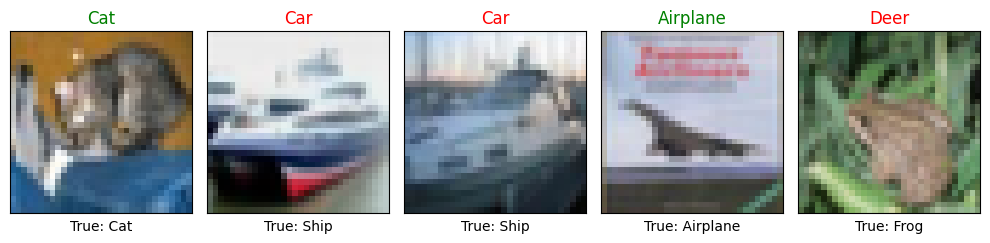

In [1]:
import numpy as np
import tensorflow as tf
from keras import datasets, models, layers
import matplotlib.pyplot as plt

# 1. Load Dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# 2. Flatten images & normalize to [0, 1]
train_images = train_images.reshape((train_images.shape[0], -1)) / 255.0  # (50000, 3072)
test_images  = test_images.reshape((test_images.shape[0], -1)) / 255.0    # (10000, 3072)

# 3. Define class names
class_names = ['Airplane', 'Car', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# 4. Build simple NN model
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(3072,)),  # Input layer
    layers.Dense(256, activation='relu'),                       # Hidden layer
    layers.Dense(10)                                            # Output layer (logits)
])

# 5. Compile model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# 6. Train model
model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=64,
    validation_data=(test_images, test_labels),
    verbose=2
)

# 7. Evaluate
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.2f}")

# 8. Prediction example
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images, verbose=0)

print(f"Predicted label: {class_names[np.argmax(predictions[0])]} | "
      f"True label: {class_names[test_labels[0][0]]}")

# 9. Show a few test images with predicted and true labels
num_images_to_show = 5
plt.figure(figsize=(10, 5))

for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    
    # reshape back to (32, 32, 3) for display
    plt.imshow(test_images[i].reshape(32, 32, 3))
    
    pred_label = class_names[np.argmax(predictions[i])]
    true_label = class_names[test_labels[i][0]]
    
    # Title color: green if correct, red if wrong
    color = 'green' if pred_label == true_label else 'red'
    plt.title(pred_label, color=color)
    plt.xlabel(f"True: {true_label}")

plt.tight_layout()
plt.show()


In [9]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten 
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def build_model(hidden_units=4, activation='relu', optimizers='adam', learning_rate=0.01):
    model=Sequential()
    model.add(Flatten(input_shape=(2,)))
    model.add(Dense(hidden_units, activation=activation))
    model.add(Dense(1, activation='sigmoid'))

    opt=tf.keras.optimizers.get(optimizers)
    opt.learning_rate = learning_rate

    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

In [10]:
inputs = np.array([[0,0],[0,1],[1,0],[1,1]])
outputs = np.array([[0],[1],[1],[0]])

In [11]:
parm_grid = {
    "model__hidden_units" : [2, 4, 8],
    "model__activation" : ['relu', 'tanh'],
    "model__optimizers" : ['adam', 'sgd'],
    "model__learning_rate" :[0.01,0.1],
    'epochs':[50,100]
}

model = KerasClassifier(model=build_model, verbose=0)
grid = GridSearchCV(estimator=model, param_grid=parm_grid, cv=3)
grid_result = grid.fit(inputs, outputs)

c:\Users\prita\OneDrive\Documents\Sem3_codes\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\prita\OneDrive\Documents\Sem3_codes\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\prita\OneDrive\Documents\Sem3_codes\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


c:\Users\prita\OneDrive\Documents\Sem3_codes\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


c:\Users\prita\OneDrive\Documents\Sem3_codes\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\prita\OneDrive\Documents\Sem3_codes\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\prita\OneDrive\Documents\Sem3_codes\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\prita\OneDrive\Docu

In [12]:
print(grid_result.best_score_)
print(grid_result.best_params_)

0.6666666666666666
{'epochs': 50, 'model__activation': 'relu', 'model__hidden_units': 4, 'model__learning_rate': 0.01, 'model__optimizers': 'sgd'}


In [15]:
import numpy as np
from sklearn.datasets import load_iris

class Perceptron:
    def __init__(self, n_iter, learning_rate):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
    
    def activation(self, x):
        return 1 if x>0 else 0
    
    def fit(self, X,y):
        n_samples, n_features =X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights)+self.bias
                y_predicted = self.activation(linear_output)
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += self.learning_rate*update
                self.bias += update

    def predict(self, X):
        if X.ndim == 1:
            linear_output = [np.dot(X,self.weights) + self.bias]
        else:
            linear_output = np.dot(X, self.weights)+ self.bias

        y_predicted = np.array([self.activation(val) for val in linear_output])
        return y_predicted
    
if __name__ == "__main__":
    iris=load_iris()
    X = iris.data
    y = iris.target
    y = np.where(y==0,0,1)

    p = Perceptron(learning_rate=0.01, n_iter=10)
    p.fit(X=X,y=y)
    predictions = p.predict(X)
    print(predictions)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [4]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dropout, MaxPooling2D, Dense, BatchNormalization, Conv2D, Flatten
from keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

x_train = x_train.reshape(60000,28,28,1)/255.0
x_test = x_test.reshape(10000,28,28,1)/255.0

y_train = tf.one_hot(y_train, depth=10)
y_test = tf.one_hot(y_test,depth=10)

model = Sequential([
    Conv2D(32, input_shape=(28,28,1), activation='relu', kernel_size=(3,3)),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),

    Conv2D(64, activation='relu', kernel_size=(3,3)),
    MaxPooling2D(pool_size=(2,2)),
    BatchNormalization(),

    Conv2D(64, activation='relu', kernel_size=(3,3)),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),

    Dropout(0.25),
    Dense(10, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=['accuracy']
)
history = model.fit(x_train, y_train, epochs=5, validation_split=0.3, verbose=1)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")



c:\Users\prita\OneDrive\Documents\Sem3_codes\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 39s 26ms/step - accuracy: 0.8017 - loss: 0.5689 - val_accuracy: 0.8535 - val_loss: 0.4101
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - accuracy: 0.8537 - loss: 0.4030 - val_accuracy: 0.8719 - val_loss: 0.3497
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 41s 31ms/step - accuracy: 0.8724 - loss: 0.3541 - val_accuracy: 0.8757 - val_loss: 0.3355
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 74s 25ms/step - accuracy: 0.8834 - loss: 0.3222 - val_accuracy: 0.8810 - val_loss: 0.3242
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 34s 26ms/step - accuracy: 0.8883 - loss: 0.3011 - val_accuracy: 0.8827 - val_loss: 0.3194
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8759 - loss: 0.3443
Test Accuracy: 0.8759


In [9]:
import tensorflow as tf
from keras.layers import Dense
from keras.models import Sequential
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.reshape(x_train.shape[0],-1)/255.0
x_test = x_test.reshape(x_test.shape[0],-1)/255.0

model = Sequential([
    Dense(512, activation='relu', input_shape=(3072,)),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test), verbose=1)
loss, acc = model.evaluate(x_test, y_test)
print(acc)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 35ms/step - accuracy: 0.3317 - loss: 1.8695 - val_accuracy: 0.3581 - val_loss: 1.7572
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 58ms/step - accuracy: 0.4027 - loss: 1.6670 - val_accuracy: 0.4291 - val_loss: 1.6027
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.4348 - loss: 1.5814 - val_accuracy: 0.4455 - val_loss: 1.5577
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 51ms/step - accuracy: 0.4541 - loss: 1.5216 - val_accuracy: 0.4404 - val_loss: 1.5654
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 53ms/step - accuracy: 0.4660 - loss: 1.4952 - val_accuracy: 0.4649 - val_loss: 1.5143
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.4649 - loss: 1.5143
0.4648999869823456


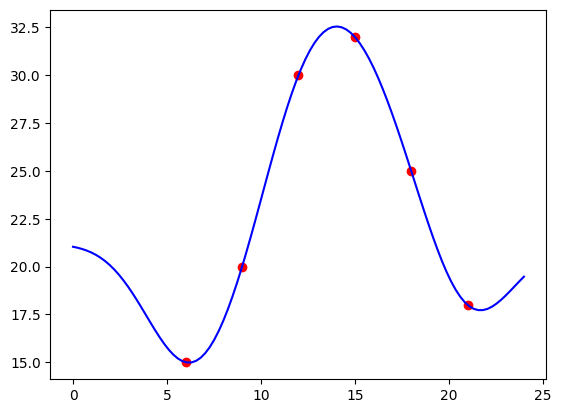

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def rbf(x,c,gamma=0.1):
    return np.exp(-gamma*(x-c)**2)

time = np.array([6,9,12,15,18,21]).reshape(-1,1)
temp = np.array([15,20,30,32,25,18])

centers = time.flatten()
gamma = 0.1

x_rbf = np.zeros((len(time),len(centers)))
for i, c in enumerate(centers):
    x_rbf[:,i] = rbf(time.flatten(), c, gamma)

model = LinearRegression()
model.fit(x_rbf, temp)

time_test = np.linspace(0,24,100)
x_rbf_test = np.zeros((len(time_test), len(centers)))
for i, c in enumerate(centers):
    x_rbf_test[:,i]=rbf(time_test.flatten(), c, gamma)

temp_pred = model.predict(x_rbf_test)

plt.scatter(time, temp, color='red', label='Actual')
plt.plot(time_test, temp_pred, color='blue', label='Predictions')
plt.show()